In [1]:
#writing an RK4 integrator !! 

import numpy as np
import matplotlib.pyplot as plt

In [100]:

#function to integrate 
def f(x,y): 
    f.counter += 1 
    dydx= y/(1+x**2)
    return dydx
f.counter = 0


def rk4(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

npt=200
x=np.linspace(-20,20,npt)
y_1 =np.zeros(npt)
y_1[0] = 1 #starting conditions

for i in range(npt-1):
    h=x[i+1]-x[i]
    y_1[i+1]=rk4(f,x[i],y_1[i],h)
    
#can find the amplitude using the initial conditions
A = 1/np.exp(np.arctan(-20))

#finding the error 
truth=A*np.exp(np.arctan(x))
print('error using the single step:',np.std(truth-y_1))

error using the single step: 0.00012017072310956975


the function was called this many times: 796


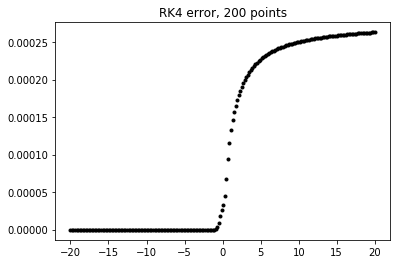

In [62]:
#plotting 
plt.ion()
plt.plot(x,truth-y_1,'k.')
plt.title('RK4 error, ' + repr(npt)+ ' points')
plt.savefig('rk4_err.png')
print('the function was called this many times:', f.counter)

2.17963363643725e-07
the function was called this many times: 2388


Text(0.5, 1.0, 'RK4 half step error, 200 points')

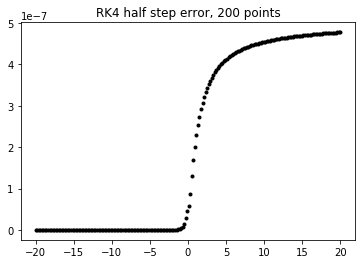

In [104]:
#now writing the second one, 
#This one is supposed to take a step of length h, and compare it to doing
#2 steps of h/2 to cancel out the leading-order error term ... 


#this will follow the same general format of the previous integrator

f.counter = 0

def rk4_stepd(fun,x,y,h):
    #evaluating normally, using the single step 
    y1 = rk4(fun,x,y,h)
    #evaluating twice at a half step 
    y2 = rk4(fun,x,y,h/2)
    y3 = rk4(fun,x+h/2,y2,h/2)
    delta = y3 - y1 
    return y3 + delta/15

    
y_2 = np.zeros(npt)
y_2[0] = 1 #same initial conditions 

for i in range(npt-1):
    h=x[i+1]-x[i]
    y_2[i+1]=rk4_stepd(f,x[i],y_2[i],h)
    

print(np.std(truth-y_2))
plt.plot(x,y_2-truth,'k.')
#plt.plot(x,truth)

print('the function was called this many times:', f.counter)
#print('why does this get funky around x = 0?')
plt.title('RK4 half step error, ' + repr(npt)+ ' points')

the function was called this many times: 792
why does this get funky around x = 0?


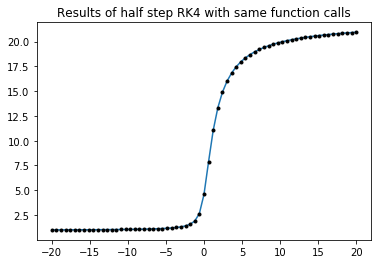

In [105]:
#The error here is much better! but we use more function calls
#If I reduce the number of steps we take in the second evaluation
#We can reduce the number of function calls 
#The two step method uses 3 times as many function calls, so I'll reduce 
#My step size to 200/3 

f.counter=0

npt2 = 67
x2 = np.linspace(-20,20,npt2)

y_22 = np.zeros(npt2)
y_22[0] = 1 #same initial conditions 


for i in range(npt2-1):
    h2=x2[i+1]-x2[i]
    y_22[i+1]=rk4_stepd(f,x2[i],y_22[i],h2)
    



truth2 = A*np.exp(np.arctan(x2))    
plt.plot(x2,y_22)
plt.plot(x2,truth2,'k.')
plt.title('Results of half step RK4 with same function calls')
#print('the function was called this many times:', f.counter)


why does this get funky around x = 0?
we can see that although they have the same number of function calls, the half step RK4 inegrator has a better error than the one which uses a full step of h!


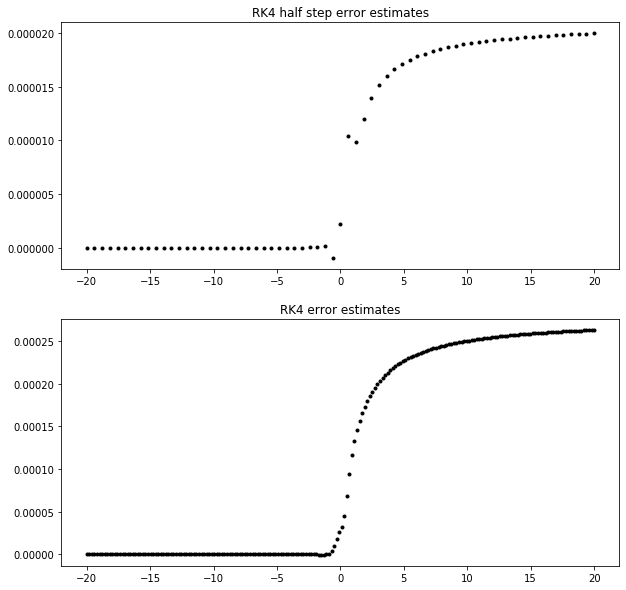

In [110]:
#plotting the two error estimates side by side 
#with the same function calls

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(x2,y_22-truth2,'k.')
ax1.set_title('RK4 half step error estimates')
ax2.plot(x,truth-y_1,'k.')
ax2.set_title('RK4 error estimates')

print('why does this get funky around x = 0?')
print('we can see that although they have the same number of function calls, the half step RK4 inegrator has a better error than the one which uses a full step of h!')